In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

from gym_minigrid_navigation.utils import show_video
from navigation_policy import gen_env, get_agent, run_episode, run_episodes

from rewards import get_reward_function
from utils import init_logger, switch_reproducibility_on, display_stats

init_logger('dqn')
init_logger('navigation_policy')

### config 

In [4]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../conf/minigrid_dqn_navigation_mlp.hocon')
config['env']['video_path'] = './video/'

In [5]:
switch_reproducibility_on(config['seed'])

### environment 

In [6]:
reward_functions = get_reward_function(config)
env = gen_env(config['env'], reward_functions)

### agent 

In [7]:
from utils import init_logger

agent = get_agent(env, config)

2021-02-04 15:50:10,084 INFO    dqn                    : Running on device: cuda:0


### trainings 

In [8]:
scores, steps = run_episodes(env, agent, n_episodes=config['training.n_episodes'], verbose=config['training.verbose'])

2021-02-04 15:51:00,247 INFO    navigation_policy      : Episode: 100. Average score: -21.399721966658507. Average steps: 82.2
2021-02-04 15:51:12,429 INFO    navigation_policy      : Episode: 200. Average score: -2.5063252307797046. Average steps: 20.58
2021-02-04 15:51:20,598 INFO    navigation_policy      : Episode: 300. Average score: -0.3705831809801337. Average steps: 13.74
2021-02-04 15:51:29,504 INFO    navigation_policy      : Episode: 400. Average score: -0.6384391357194495. Average steps: 14.96
2021-02-04 15:51:35,918 INFO    navigation_policy      : Episode: 500. Average score: 0.7528150186273679. Average steps: 10.68
2021-02-04 15:51:42,379 INFO    navigation_policy      : Episode: 600. Average score: 0.684209632631128. Average steps: 10.36
2021-02-04 15:51:47,417 INFO    navigation_policy      : Episode: 700. Average score: 1.0922303090389678. Average steps: 8.25
2021-02-04 15:51:53,057 INFO    navigation_policy      : Episode: 800. Average score: 1.0029340906693243. Aver

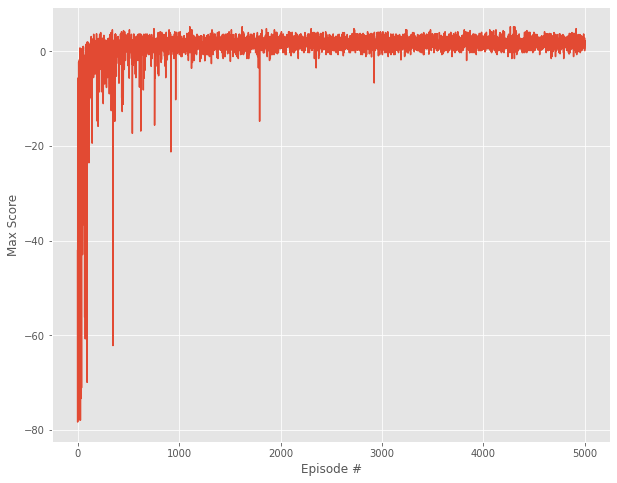

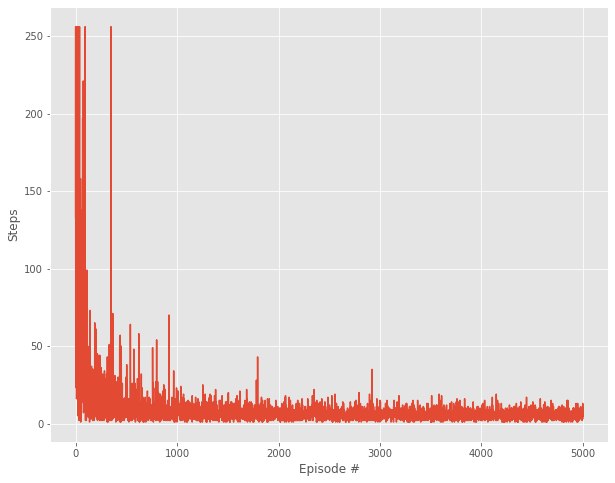

In [9]:
display_stats(scores, steps)

### visualisation 

In [10]:
env = gen_env(config['env'], reward_functions)
print(run_episode(env, agent, train_mode=False))

show_video()

(2.748064097795284, 5)
